In [123]:
import numpy as np
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
import math
from tabulate import tabulate

# Problem 1 Transformation of variables

For a random uniform distribution of x between 0 and 1, the probability density function is f(x). Find the probability density function g(u) of transformation 
u
=
e
−
x
.

a. Show details to derive the formula g(u).

b. Draw three figures: transformation function u(x), f(x) and g(u)

For a transformation of the p.d.f $f(x)=u$ to $g(u)$ by function $u(x)$, the relationship between the three functions in differential form is <br>
\begin{gather*}
    g(u)=f(x)+|\frac{dx}{du}| 
\end{gather*}
To solve for $g(u)$ given this relation and the function $u=e-x$, first express x in terms of u <br>
\begin{gather*}
    u=e-x \\
    x=e-u
\end{gather*}
Solving for $\frac{du}{dx}$ <br>
\begin{gather*}
    \frac{du}{dx}=\frac{d}{dx}(e-x) \\
    =\frac{d}{dx}(-x) \\
    =-1*(x)^0 \\
    =-1
\end{gather*}
Thus, <br>
\begin{gather*}
    g(u)=u*(-1) \\
    =-u
\end{gather*}


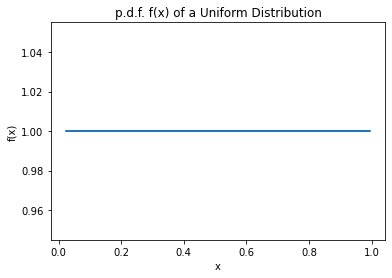

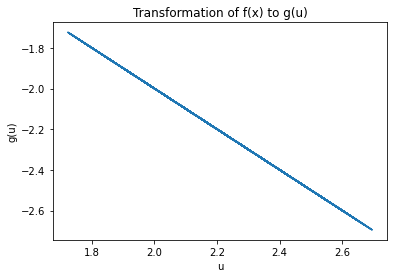

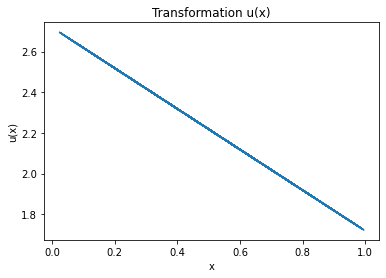

In [157]:
x = uniform.rvs(size = 100)


def u(x):
    return math.e - x

def g(u):
    return -u


u = u(x)
g = g(u)


plt.plot(x, uniform.pdf(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('p.d.f. f(x) of a Uniform Distribution')
plt.show()

plt.plot(u, g)
plt.xlabel('u')
plt.ylabel('g(u)')
plt.title('Transformation of f(x) to g(u)')
plt.show()

plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Transformation u(x)')
plt.show()

# 2) Rolling two 6-sided dices.
Each of the faces has the same probability of landing facing up. Calculate analytic answers of following questions (show details).

a. What is the probability of rolling snake eyes (two 1s)?

b. What is the probability of rolling fives (dice sum to five)?

c. Rolling dices 5 times and get at least one snake eye. Is the probability larger than rolling fives?


In [154]:
snake_eyes = (1 / 6) * (1 / 6)
print('The probability of snake eyes is snake_eyes=', snake_eyes)

fives = 6 * ((1 / 6) * (1 / 6))
print('The probability of rolling a sum of 5 is fives=', fives)

P_none = (1-snake_eyes) ** 5
P = 1 - P_none
print('The probability of rolling dice 5 times and getting at least one snake eye is P =', P)

The probability of snake eyes is snake_eyes= 0.027777777777777776
The probability of rolling a sum of 5 is fives= 0.16666666666666666
The probability of rolling dice 5 times and getting at least one snake eye is P = 0.13138421387851618
0.13138421387851618


# 3) Compare probability distribution functions
Three probability distribution functions: Binomial, Poisson and Normal function.

a. Binomial (N=10, p=0.02), Poisson (
λ
=
0.2
), Normal(
μ
=
0.2
, 
σ
=
0.45
)

    i) Draw 3 functions in the same plot, and scale the area under the curve of each fucntion to 1. 

    ii) Create a table to compare numerical values of Mean, Sigma, Skewness and Kurtosis, e.g. 

pdf	mean	sigma	sknewness	kurtosis
Binomial				
Poisson				
Normal				


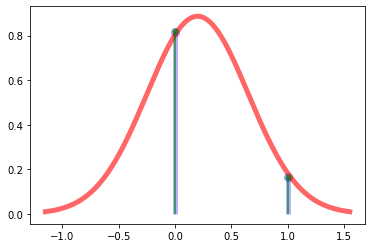

pdf         miu      sigma       skew    kurtosis
--------  -----  ---------  ---------  ----------
Binomial      0  0.25       0           0.0625
Poisson       0  0.107251   0           0.0115028
Normal        0  0.0957405  0.0115847   0.0149393


In [158]:
# part 1
fig, ax = plt.subplots(1,1)

n = 10
p = 0.02
b = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(b, binom.pmf(b, n, p), 'bo', ms=8, label='binom pmf', alpha=0.3)
ax.vlines(b, 0, binom.pmf(b, n, p), colors='b', lw=5, alpha=0.3)

x = np.linspace(-1.15, 1.55, 10000)
ax.plot(x, norm.pdf(x, loc=0.2, scale=0.45),'r-', lw=5, alpha=0.6, label='norm pdf')


mu = 0.2
p = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))   
ax.plot(p, poisson.pmf(p, mu), 'go', ms=5, label='poisson pmf', alpha=0.6)
ax.vlines(p, 0, poisson.pmf(p, mu), colors='g', lw=2, alpha=0.6)

plt.show()



# Part 2

binom_pmf = binom.pmf(b, n, p)
binomial_miu = stats.moment(binom_pmf, moment=1)
binomial_sigma = stats.moment(binom_pmf, moment=2)
binomial_skew = stats.moment(binom_pmf, moment=3)
binomial_kurtosis = stats.moment(binom_pmf, moment=4)

normal_pdf = norm.pdf(x, loc=0.2, scale=0.45)
normal_miu = stats.moment(normal_pdf, moment=1)
normal_sigma = stats.moment(normal_pdf, moment=2)
normal_skew = stats.moment(normal_pdf, moment=3)
normal_kurtosis = stats.moment(normal_pdf, moment=4)

poisson_pmf = poisson.pmf(p, mu)
poisson_miu = stats.moment(poisson_pmf, moment=1)
poisson_sigma = stats.moment(poisson_pmf, moment=2)
poisson_skew = stats.moment(poisson_pmf, moment=3)
poisson_kurtosis = stats.moment(poisson_pmf, moment=4)




table = [["Binomial", binomial_miu, binomial_sigma, binomial_skew, binomial_kurtosis],
         ["Poisson", poisson_miu, poisson_sigma, poisson_skew, poisson_kurtosis],
         ["Normal", normal_miu, normal_sigma, normal_skew, normal_kurtosis]]
print(tabulate(table, headers=["pdf", "miu", "sigma", "skew", "kurtosis"]))


b. Binomial (N=100, p=0.02), Poisson (
λ
=2), Normal(
μ
=
2
, 
σ
=
1.4
)

    i) Draw 3 functions in the same plot, and scale the area under the curve of each fucntion to 1. 

    ii) Create a table to compare numerical values of Mean, Sigma, Skewness and Kurtosis for each function. 




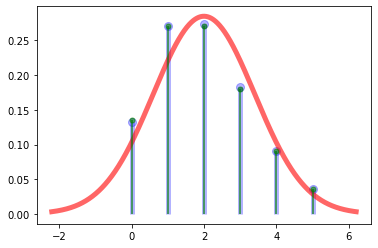

pdf         miu         sigma           skew       kurtosis
--------  -----  ------------  -------------  -------------
Binomial      0  nan           nan            nan
Poisson       0    0.0076089    -1.21727e-05    9.28294e-05
Normal        0    0.00989466    0.000386065    0.000159643


In [148]:
# Part 1
fig, ax = plt.subplots(1,1)

n = 100
p = 0.02
b = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(b, binom.pmf(b, n, p), 'bo', ms=8, label='binom pmf', alpha=0.3)
ax.vlines(b, 0, binom.pmf(b, n, p), colors='b', lw=5, alpha=0.3)

x = np.linspace(-2.2, 6.2, 1000)
ax.plot(x, norm.pdf(x, loc=2.0, scale=1.4), 
       'r-', lw=5, alpha=0.6, label='norm pdf')

mu = 2.
p = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(p, poisson.pmf(p, mu), 'go', ms=5, label='poisson pmf', alpha=0.6)
ax.vlines(p, 0, poisson.pmf(p, mu), colors='g', lw=2., alpha=0.6)

plt.show()


# Part 2

binom_pmf = binom.pmf(b, n, p)
binomial_miu = stats.moment(binom_pmf, moment=1)
binomial_sigma = stats.moment(binom_pmf, moment=2)
binomial_skew = stats.moment(binom_pmf, moment=3)
binomial_kurtosis = stats.moment(binom_pmf, moment=4)

normal_pdf = norm.pdf(x, loc=2., scale=1.4)
normal_miu = stats.moment(normal_pdf, moment=1)
normal_sigma = stats.moment(normal_pdf, moment=2)
normal_skew = stats.moment(normal_pdf, moment=3)
normal_kurtosis = stats.moment(normal_pdf, moment=4)

poisson_pmf = poisson.pmf(p, mu)
poisson_miu = stats.moment(poisson_pmf, moment=1)
poisson_sigma = stats.moment(poisson_pmf, moment=2)
poisson_skew = stats.moment(poisson_pmf, moment=3)
poisson_kurtosis = stats.moment(poisson_pmf, moment=4)




table = [["Binomial", binomial_miu, binomial_sigma, binomial_skew, binomial_kurtosis],
         ["Poisson", poisson_miu, poisson_sigma, poisson_skew, poisson_kurtosis],
         ["Normal", normal_miu, normal_sigma, normal_skew, normal_kurtosis]]
print(tabulate(table, headers=["pdf", "miu", "sigma", "skew", "kurtosis"]))


c. Binomial (N=1000, p=0.02), Poisson (
λ
=20), Normal(
μ
=
20
, 
σ
=
4.5
)

    i) Draw 3 functions in the same plot, and scale the area under the curve of each fucntion to 1. 

    ii) Create a table to compare numerical values of Mean, Sigma, Skewness and Kurtosis for each function. 

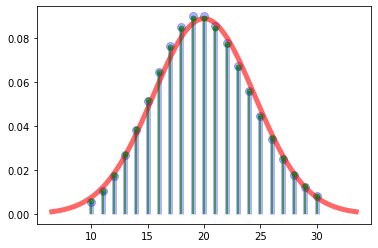

pdf         miu          sigma           skew       kurtosis
--------  -----  -------------  -------------  -------------
Binomial      0  nan            nan            nan
Poisson       0    0.000825952    2.07922e-06    1.04797e-06
Normal        0    0.000957705    1.16254e-05    1.49559e-06


In [159]:
fig, ax = plt.subplots(1,1)

n = 1000
p = 0.02
b = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(b, binom.pmf(b, n, p), 'bo', ms=8, label='binom pmf', alpha=0.3)
ax.vlines(b, 0, binom.pmf(b, n, p), colors='b', lw=5, alpha=0.3)

x = np.linspace(6.5, 33.5, 1000)
ax.plot(x, norm.pdf(x, loc = 20.0, scale = 4.5), 'r-', lw=5, alpha=0.6, label='norm pdf', )

mu = 20
p = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(p, poisson.pmf(p, mu), 'go', ms=5, label='poisson pmf', alpha=0.6)
ax.vlines(p, 0, poisson.pmf(p, mu), colors='g', lw=2, alpha=0.6)

plt.show()

# Part 2

binom_pmf = binom.pmf(b, n, p)
binomial_miu = stats.moment(binom_pmf, moment=1)
binomial_sigma = stats.moment(binom_pmf, moment=2)
binomial_skew = stats.moment(binom_pmf, moment=3)
binomial_kurtosis = stats.moment(binom_pmf, moment=4)

normal_pdf = norm.pdf(x, loc=20., scale=4.5)
normal_miu = stats.moment(normal_pdf, moment=1)
normal_sigma = stats.moment(normal_pdf, moment=2)
normal_skew = stats.moment(normal_pdf, moment=3)
normal_kurtosis = stats.moment(normal_pdf, moment=4)

poisson_pmf = poisson.pmf(p, mu)
poisson_miu = stats.moment(poisson_pmf, moment=1)
poisson_sigma = stats.moment(poisson_pmf, moment=2)
poisson_skew = stats.moment(poisson_pmf, moment=3)
poisson_kurtosis = stats.moment(poisson_pmf, moment=4)




table = [["Binomial", binomial_miu, binomial_sigma, binomial_skew, binomial_kurtosis],
         ["Poisson", poisson_miu, poisson_sigma, poisson_skew, poisson_kurtosis],
         ["Normal", normal_miu, normal_sigma, normal_skew, normal_kurtosis]]
print(tabulate(table, headers=["pdf", "miu", "sigma", "skew", "kurtosis"]))

